<h1>Math</h1>

Lets consider linear classification in its simplest form

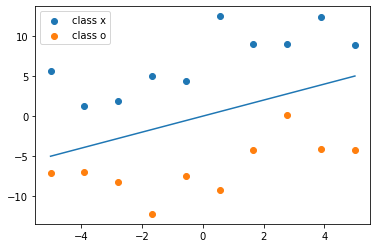

In [24]:
import numpy as np
import matplotlib.pyplot as plt 

N = 10
x = np.linspace(-5,5,N)
y = x
up = y + (np.random.random((N)))*10+2
down = y - (np.random.random((N)))*10-2


plt.scatter(x,up , label = "class x")
plt.scatter(x,down , label = "class o")
plt.plot(x,y)
plt.legend()
plt.show()

we have some points that belong to class 'x' and some points that belong to class 'o' and we would like to seperate them

of course what we can seperate them with is a line

$y = mx + b$

The general form is:

$0 = ax + by + c$

for the line y = x , a = 1 , b = -1 , c = 0

so our line (y=x) is the line $0 = x-y$

Now for a point (2,1) , should this be classified as x or o

Our line is 

$h(x) = x-y$

$h(2,1) = 1 > 0 \to 'o'$

lets try with another point (1,2)

$h(1,2) = -1 < 0 \to 'x'$

points above the line as (2,1) are 'x'

points below the line as (1,2) are 'o'

what about point (1,1)

$h(2,1) =  0 $

well for  points which lie on the line like 1,1 , we dont know !!!



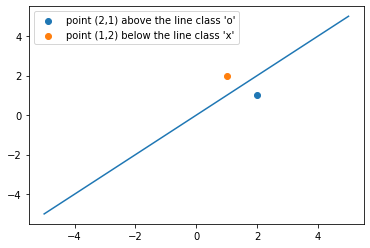

In [27]:
plt.scatter(2,1 , label = "point (2,1) above the line class 'o'")
plt.scatter(1,2 , label = "point (1,2) below the line class 'x'")
plt.plot(x,y)
plt.legend()
plt.show()

we call each point $(x,y) \to (x_1,x_2) = x$

we rename the constants to $w_i$

we call the bias term / ontercept w_0

h(x) = w_0 + w_1x_1 + w_2x_2

Thus we say h is a linear combination of components of x

if we want to vectorise this we create a dummy variable $x_0$ swhich is always equal to  1 then  get :

$h(x) = w^Tx$

In 3-dimensions we have a plane , in > 3 dimensions we have a hyperplane

<h1>Math</h1>

We want to know how to obtain the prediction using logistic regression

Assume we have 2 dimensional inputs , then 

$y = w_1x_1 + w_2x_2$

after obtaining y , we pass y through a logistic function , these can be

Hyperbolic tangent :

$tanh(x) \  \in \ (-1,1)$

or sgmoid :

$\sigma(z) = \frac {1} {1+e^{-z}} \in (0,1)$

in both cases y is a value from 0 to 1 , from then we decide the class

so our outputs is

$\sigma(w^Tx)$

if this values > 0.5 then class 'o' if less than class 'x' of =0.5 then we are on the boundary 
 
we usually say anything above 0.5 gives us class 1 and anything else gives us class 0 

notice how the only difference between logistic regression and the linear classifier mentioned earlier is the logisitc function we add at the end

<h1>code</h1>

In [48]:
# we want to see a simple example of the feed-forward process 
import numpy as np

N = 100
D = 2
# lets create some data
X = np.random.randn(N,D)
# now we add the colums for the bias term
ones = np.atleast_2d(np.ones(N)).T
X = np.hstack((ones,X))

In [52]:
# D+1 since we add a bias term
w = np.random.randn(D+1)
z = X.dot(w)

In [53]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [54]:
#now we get our output
print(sigmoid(z))

[0.57048646 0.62432508 0.87177737 0.810985   0.40492431 0.68944024
 0.50208896 0.719525   0.87110022 0.80908985 0.75448827 0.88474687
 0.66793336 0.8864108  0.34847176 0.95446097 0.7741574  0.74087443
 0.90062781 0.62538938 0.92285911 0.9794434  0.70255358 0.86196442
 0.68262612 0.47664767 0.8439977  0.65289225 0.76792441 0.80097955
 0.81243133 0.57651154 0.77488469 0.70348409 0.85287407 0.82277536
 0.63825463 0.86376278 0.72653231 0.81559695 0.90727502 0.92779403
 0.85981624 0.81056823 0.71232492 0.33234592 0.60424757 0.84444591
 0.93271472 0.91860564 0.57520252 0.57248332 0.51972013 0.60849299
 0.63533446 0.86932069 0.5981368  0.67243701 0.88964126 0.60913365
 0.72353474 0.70408764 0.86449208 0.74132711 0.97328204 0.86263753
 0.86776379 0.80128582 0.69882242 0.21568428 0.30959215 0.71467853
 0.48004684 0.86027545 0.83385308 0.21849579 0.88724865 0.86166305
 0.91181687 0.79926008 0.91048271 0.7548906  0.88465899 0.84768046
 0.83969685 0.47202148 0.61257937 0.87012196 0.83547874 0.8251

In [55]:
# as we expected all our values are between 0 and 1

<h1>Math</h1>

We want to know how to interpret the output of the logistic regression $\sigma(w^Tx)$

Assuming we go with binary classification , where each point belongs to either class 0 or 1 , we say that 

$p(y = 1 | x) = \sigma(w^Tx) \in (0,1)$

so our output is the probability that this point belongs to class 1

since all probabilities must some up to 1 we can also deduce :

$p(y = 0 | x) = 1 - \sigma(w^Tx) $

if we  take 0.5 as the threshold we can say :

predict round(p(y=1 | x)) , of course in this case a point with p = 0.5 ends up in class 1

its also possible to use thresholds other than 0.5 but not common in deep learning

How does this make sense , well:

1) as we get further from the line , $|w^Tx|$ gets larger , and so we get closer to 0 or 1

2) a point that lies exactly on the line , has $w^Tx = 0$ , $\sigma(0)$ = 0.5

makes sense !!!

<h1>code</h1>

In [58]:
# now we work on some real data
import numpy as np
import pandas as pd

In [60]:
df = pd.read_csv('datasets/ecommerce_data.csv')
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [116]:
data = df.to_numpy()
X = data[:,:-1]
Y = data[:,-1]

N,D = X.shape
# now normalise numeric columns  , n_products_viewed and visit duration
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()

In [129]:
# now one of the columns is time_of day
# the time of day is categorised into 4 categories
# 0,1,2,3 each spanning 6 hours of the day
# since this is a categorical variable we want to one hot encode it
# there are other categorical variables, but these are binary ones, and so we can let the effect of the other category be absorbed into the bias term
# so we need to add another 4 one hot encoded columns

for i in range(4):
    col = np.zeros(N)
    col[X[:,4] == i] = 1 
    X = np.hstack((X,np.atleast_2d(col).T))

# then we delete the original column
X = np.delete(X,4,1)

In [135]:
# for now we will work on binary classification
# so we will take only samples where Y = 0 or Y = 1
X = X[Y<=1]
Y = Y[Y<=1]

In [145]:
N,D = X.shape
W = np.random.randn(D)
# we use a bias term , equivalenty we could have had X with one more column of 1s and W to be D+1
b = 0 

In [146]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

def forward(X,W,b):
    return sigmoid(X@W + b)

In [147]:
P_Y_given_X = forward(X,W,b)
predictions = np.round(P_Y_given_X)

In [148]:
def classification_rate(Y,P):
    return np.mean(Y==P) 

In [149]:
print("Score",classification_rate(Y,predictions))

Score 0.5251256281407035


In [150]:
# The random weights got us a low score
# what we want to do next is train these weights to get a higher score
# note that scores may vary widely for each run of this code since we work with randomly set weights